<a href="https://colab.research.google.com/github/Alejandro-sin/Learning-Path-to-AI/blob/master/Learning_Path_to_AI_DeepLearning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - 1

Esta serie de Jupyters tiene como porpósito recopilar el estudido de aprendizaje profundo utilizando diferentes frameworks de trabajo. `Pythorch` es el framework por excelencia. Para ejecutar código de pythorch, utilizaremos GPU utilizando `CUDA` que es un framework de procesamiento paralelo.


Para empezar con los cimientos, la unidad fundamental de las cargas de trabajo en DL son los tensores, estos son estructuras que nos permitiran tener arreglos dimensionales en n-dimensiones, con m-formas.

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu121


In [4]:
print(torch.cuda.is_available())

False


## Tensores

#### Scalar, Vector, Matriz


Estos tres casos especiales de los tensores, los podemos crear con `torch.tensor`,  es importante entender que la dimensión del tensor y la forma del tensor son dos cosas diferentes. Con dimensiones nos referimos al número de ejes o niveles de profundidad que tiene la estructura del tensor. En términos prácticos:

- **Dimensión (Rank)**: Es el número de índices necesarios para identificar cada elemento en el tensor.

- **Forma (Shape)**: Es una tupla que describe cuántos elementos hay en cada dimensión.

![Tensors](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)


In [14]:
scalar = torch.tensor(3) # Escalar
print("Dimension: ", scalar.ndim)
print("Shape: ", scalar.shape)


vector = torch.tensor([7, 7]) # Vector
print("Dimension: ", vector.ndim)
print("Shape: ", vector.shape)

MATRIX = torch.tensor([[7, 8],
                        [9, 10]]) # Matriz
print("Dimension: ", MATRIX.ndim)
print("Shape: ", MATRIX.shape)

Dimension:  0
Shape:  torch.Size([])
Dimension:  1
Shape:  torch.Size([2])
Dimension:  2
Shape:  torch.Size([2, 2])


### Tensores Aleatorios.

Los tensores aleatorios son fundamentales cuando trabajamos con redes neuronales, ya que sirven para inicializar las redes con valores que luego se ajustarán para representar mejor los datos de entrada.

- Comenzamos con números aleatorios.
- Observamos los datos.
- Ajustamos los números (pesos).
- Volvemos a observar los datos.

Es importante aclarar que estos valores son pseudoaleatorios, ya que, para garantizar la reproducibilidad, se utilizan secuencias con propiedades estadísticamente "aleatorias". En PyTorch, tanto en CPU como en GPU, se emplea un generador de secuencias pseudoaleatorias.




La inicialización de una red neuronal con valores aleatorios es crucial para romper la simetría entre nodos y permitir un aprendizaje efectivo. Sin embargo, estos valores deben diseñarse cuidadosamente para evitar problemas como el estancamiento por gradientes vanishing o exploding, que pueden surgir si los pesos son demasiado pequeños o demasiado grandes. Inicializar con valores verdaderamente aleatorios podría introducir ruido impredecible, causando saturación de activaciones, inestabilidad en los gradientes, menor reproducibilidad y un entrenamiento más lento o incluso fallido. Por esta razón, se utilizan técnicas como Xavier o He Initialization, que optimizan las propiedades estadísticas de los valores iniciales para garantizar un entrenamiento eficiente.


Problemas conocidos:

- **Simetría**: Evita que las neuronas aprendan de manera independiente.
Solución: Inicialización aleatoria.

- **Vanishing Gradients**: Dificulta el aprendizaje en capas profundas.
Solución: Funciones de activación como ReLU, inicialización cuidadosa.

- **Exploding Gradients**: Hace el entrenamiento inestable.
Solución: Clipping de gradientes, inicialización optimizada, normalización.


In [15]:
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.0083, 0.0809, 0.5026, 0.3941],
        [0.3248, 0.1442, 0.6658, 0.1607],
        [0.2272, 0.6667, 0.3297, 0.0048]])

In [16]:
random_tensor = torch.rand(size=(3, 224, 224)) # [colour_channels, height, width]
random_tensor[0][:1]

tensor([[0.1240, 0.8688, 0.3759, 0.8904, 0.7319, 0.8782, 0.3135, 0.3112, 0.1816,
         0.1417, 0.4774, 0.1445, 0.4027, 0.6809, 0.2183, 0.6259, 0.0528, 0.5159,
         0.3406, 0.1389, 0.2943, 0.8344, 0.7123, 0.5255, 0.5101, 0.5023, 0.2796,
         0.5894, 0.0185, 0.3247, 0.1523, 0.6756, 0.9703, 0.1041, 0.7239, 0.0735,
         0.8917, 0.7419, 0.5736, 0.6878, 0.8060, 0.7817, 0.1219, 0.6826, 0.0038,
         0.8916, 0.1507, 0.3114, 0.7370, 0.8494, 0.8394, 0.1329, 0.0064, 0.2143,
         0.7472, 0.0845, 0.4582, 0.0189, 0.4775, 0.0852, 0.3575, 0.6681, 0.4417,
         0.2280, 0.7875, 0.7232, 0.3951, 0.7314, 0.5847, 0.7022, 0.0677, 0.3007,
         0.1217, 0.8971, 0.3582, 0.8763, 0.4954, 0.9664, 0.8853, 0.5711, 0.0589,
         0.8848, 0.3601, 0.7512, 0.4415, 0.7528, 0.5795, 0.2449, 0.2593, 0.1656,
         0.7046, 0.6807, 0.6527, 0.2412, 0.4336, 0.0047, 0.7203, 0.3640, 0.8806,
         0.1052, 0.8526, 0.6994, 0.7326, 0.0448, 0.6919, 0.1097, 0.8695, 0.1467,
         0.5757, 0.6787, 0.3

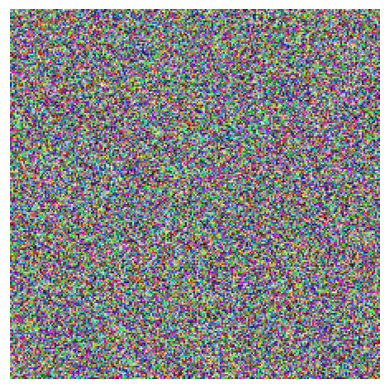

In [17]:
# Cambiar a formato adecuado para Matplotlib
image_tensor = random_tensor.permute(1, 2, 0)  # (altura, anchura, canales)

# Escalar los valores a 0-255
image_array = (image_tensor * 255).byte().numpy()

# Visualizar la imagen
plt.imshow(image_array)
plt.axis('off')  # Ocultar ejes
plt.show()


### Tensores Nulos


Podemos crear diferentes tensores, dos casos muy útiles son tensores llenos de 0, y valores con 1,  ¿pero para qué usamos esto?,

Un tensor nulo es un tensor lleno de ceros que se puede crear fácilmente con la función `torch.zeros`, este tensor tiene dimensiones específicas y se utiliza frecuentemente en operaciones de inicialización, enmascaramiento y manipulación de datos.


**Inicialización de pesos o buffers**:

- Al diseñar redes neuronales o algoritmos, los tensores llenos de ceros se usan como punto de partida o para almacenar valores que se actualizarán dinámicamente.
Máscaras:

- Se utiliza para marcar ciertos valores o posiciones como inactivos en un tensor. Por ejemplo, en el caso de enmascaramiento de columnas o filas, los valores enmascarados se establecen en 0 para ignorarlos en cálculos posteriores.


- En tareas como procesamiento de texto o series temporales, donde las secuencias tienen diferentes longitudes, se usa `torch.zeros()` para rellenar las secuencias más cortas y hacerlas del mismo tamaño.


In [18]:
zeros_tensor = torch.zeros(3, 4)
zeros_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### Tensores Unitarios


Un tensor unitario es un tensor lleno de unos, creado con torch.ones(). Es útil para inicializaciones específicas o para representar valores constantes.


**Inicialización constante**:

- Útil cuando se necesitan tensores con valores uniformes para cálculos iniciales o pruebas.

**Escalado o Normalización**:

- En algunos algoritmos, se usan tensores de unos para escalar valores o realizar operaciones como multiplicaciones constantes.

**Máscaras invertidas**:

- Junto con tensores de ceros, los tensores de unos se usan para marcar valores activos o regiones importantes en un tensor.


**Operaciones de broadcasting**:

- Cuando necesitas agregar una constante en una operación, `torch.ones()` puede facilitar el manejo de dimensiones.

In [19]:
ones_tensor = torch.ones(3, 4)
ones_tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Tensor Range & Tensor Like

In [20]:
torch.range(0,5)


<ipython-input-20-0471aa9bd2fe>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(0,5)


tensor([0., 1., 2., 3., 4., 5.])

In [21]:
torch.arange(start=0, end=5, step=1)

tensor([0, 1, 2, 3, 4])

Cuando queremos crear un tensor parecido a otro podemos uar funciones como "tensor-like", se usa con la intención arreglos de tensores parecdios

In [22]:
tensor_like = torch.zeros_like(input=ones_tensor)
tensor_like

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### Tensor datatypes


Los tipos de datos de los tensores representan uno de los 3 errores más frecuentes que tendremos en Pythorch y Deeplearning.  El tipo de dato que seleccionamos tiene que ver con la precisión que requerimos para nuestro experimento.

1. El tipo de datos del tensor no es el apropiado.
2. La forma del tensor no es la esperada.
3. Los tensores no están computando en el dispositivo apropiado.


La selección del tipo de dato depende de nuestro enfoque.

- `float16`: Tiene menos precisión, pero facilita el ahorro de recursos de cómputo. Es una buena opción si los recursos son limitados y se puede sacrificar algo de precisión. Sin embargo, para entrenar modelos, se requieren técnicas como "[mixed precision training](https://arxiv.org/abs/1710.03740)".  
  Esta técnica combina almacenar pesos, activaciones y gradientes en media precisión, mientras mantiene una copia de los pesos en precisión simple (`float32`) para acumular gradientes. Además, escala las pérdidas para manejar la pérdida de precisión inherente. Este enfoque reduce el consumo de memoria hasta un 50% y es efectivo en modelos grandes con más de 100 millones de parámetros. También puede aprovechar aceleraciones futuras en hardware optimizado para media precisión.  

  Para modelos más complejos, PyTorch incluye el `Automatic Mixed Precision` o [AMP](https://pytorch.org/tutorials/recipes/recipes/amp_recipe.html).

- `float32`: Es el formato más común debido a la estabilidad y precisión que brinda. Es el más utilizado en la mayoría de las aplicaciones de machine learning.

- `float64`: Aunque es más lento por el alto consumo de recursos, es relevante en aplicaciones científicas que requieren mayor precisión. No es ideal para la mayoría de los casos en machine learning debido a su costo computacional.




In [26]:
# covertir tipos de datos de tensores
float_32_tensor = torch.tensor([3.0, 6.1, 2.1],
                               dtype=None,
                               device=None,
                               requires_grad=False)
float_32_tensor.dtype

torch.float32

In [24]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3.0000, 6.1016, 2.0996], dtype=torch.float16)

PyTorch automáticamente convierte los tensores al tipo de dato de mayor precisión en operaciones mixtas. Esto es conocido como `upcasting`. En este caso, float16 se convirtió a float32 para evitar pérdida de precisión.

No se pueden operar tensores con tipos de datos diferentes. Es una operación que requiere cuidado y análisis para no comprometer el uso inapropiado de recursos

In [29]:
float_16_tensor_a = torch.tensor([3.0, 6.1, 2.1],
                               dtype=torch.half,
                               device=None,
                               requires_grad=False)

result_tensor = float_16_tensor_a *  float_32_tensor
result_tensor.dtype

torch.float32

### Tensor Operations


Las operaciones tensoriales permiten realizar cálculos matemáticos eficientes y altamente optimizados en tensores, que son las estructuras de datos básicas en machine learning. Estas operaciones tienen una importancia clave en la construcción y entrenamiento de modelos de deep learning, ya que prácticamente todo el trabajo numérico en redes neuronales implica manipulación de tensores.


In [30]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# SUMA
c = a + b  # [5, 7, 9]
# RESTA
c = a - b  # [-3, -3, -3]

#### Multiplicación por elemento (Hadamard product, *)

Escalar valores o realizar operaciones por elemento (como en normalización o activaciones personalizadas). Se multiplica "de frente", cada entrada del tensor se multiplca por la entrada que corresponde al tensor a multiplicar.



In [31]:
c = a * b  # [4, 10, 18]
c


tensor([ 4, 10, 18])

####  Multiplicación matricial (torch.matmul o @)

Uso: Es fundamental para implementar redes neuronales. Se utiliza en operaciones como:

- Multiplicación entre pesos y activaciones.
- Cálculo de salidas lineales en redes completamente conectadas.

In [33]:
a = torch.tensor([[1, 1], [1, 1]])  # Matriz 2x2
b = torch.tensor([[1, 1], [1, 1]])  # Matriz 2x2
c = torch.matmul(a, b)
c

tensor([[2, 2],
        [2, 2]])

Las redes neuronales están llenas de multiplicaicones de matrices y producto punto, el módulo `torch.nn.Linear()` es conocido como `Feed Foward Layer` o capa completamente conectada, esta implmenta multiplicación de matrices entre un input y los pesos de la matriz.

$$y= x * A^{T} + b$$

Podemos apreciar que sigue la forma de la ecuación de la recta, aquí A comienza con pesos aleatorios, y es una matriz transpuesta, b es un sesgo que tiene  y x es el input, y vendría siendo la manipulación del input en la esperanza de descubrir patrones en este.


In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)

# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value

x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)

# This uses matrix multiplication
linear = torch.nn.Linear(in_features=3, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value

# What happens if you change in_features from 2 to 3 above? Does it error? How could you change the shape of the input (x)
# to accommodate to the error? Hint: what did we have to do to tensor_B above?

x = tensor_A.T
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

## Agregación de Tensores

En PyTorch, las operaciones de agregación permiten reducir un tensor a lo largo de una o más dimensiones mediante funciones como mínimo, máximo, promedio y suma. Estas operaciones son útiles para extraer estadísticas y reducir la dimensionalidad de los datos.

In [ ]:
# Creamos un Tensor nuevo
torch_agregation = torch.arange(0, 100, 10)
torch_agregation

In [ ]:
# Min and Max
print(f"Min: {torch_agregation.min()}")
print(f"Max: {torch_agregation.max()}")

In [ ]:
# Mean
try:
  # levantara eerror porque no existe prmedio para tipos de dato long en pytorch
  torch_agregation.mean()
except RuntimeError as e:
  print("Error: ", e)


print(f"Mean: {torch_agregation.type(torch.float32).mean()}")


## Min/Max posicional

La idea de esto es encontrar la posición del mínimo y máximo. Existens funciones como `argmin` y `argmax`

In [ ]:
# Returns index of max and min values
print(f"Index where max value occurs: {torch_agregation.argmax()}")
print(f"Index where min value occurs: {torch_agregation.argmin()}")